In [1]:
import requests
import json

URL = "https://mempool.space/api/v1/mining/blocks/fees/1w"
page = requests.get(URL).text

page_json = json.loads(page)
# print(json.dumps(dictionary, indent=4))
print(type(page_json))

print(page_json[0])
print(page_json[7])
x = page_json[0]
print(x['avgHeight'])
print(len(page_json))
print()

l = []
i = 0
while i < 8:
    y = page_json[i]
    l.append(y['avgHeight'])
    i += 1
print(l)


<class 'list'>
{'avgHeight': 805941, 'timestamp': 1693687890, 'avgFees': 11126748, 'USD': 25823}
{'avgHeight': 805957, 'timestamp': 1693700059, 'avgFees': 12949401, 'USD': 25850}
805941
374

[805941, 805944, 805946, 805949, 805951, 805952, 805954, 805957]


[805941, 805944, 805946, 805949, 805951, 805952, 805954, 805957]
6447594
[0.3535515810358253, 0.35355223905778727, 0.35355267773841487, 0.35355333575833564, 0.35355377443760244, 0.3535539937770317, 0.3535544324554821, 0.3535550904721371]


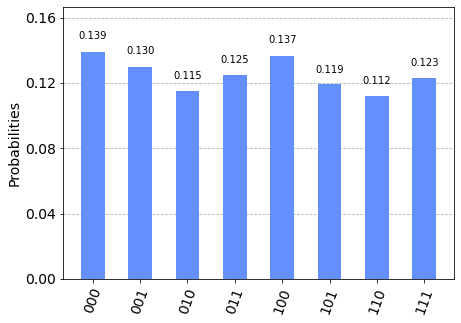

In [2]:
print(l)
a_sum = 0
norm = []
for i in range(8):
    a_sum += l[i]
print(a_sum)

for i in l:
    norm.append((i/a_sum)**0.5)
print(norm)
    
# then the set Norm will be the normalized set of 8 vector amplitudes

from qiskit import *
from qiskit.visualization import plot_histogram

qr = QuantumRegister(3,'qr')
cr = ClassicalRegister(3,'cr')
qc = QuantumCircuit(qr,cr)

qc.initialize(norm, qc.qubits)
qc.measure(qr,cr)

sim = Aer.get_backend('qasm_simulator')
job = execute(qc, sim, shots = 1024)
counts = job.result().get_counts()
plot_histogram(counts)

In [3]:
# Using a real quantum computer

from qiskit import IBMQ
from qiskit import qiskit, execute, QuantumCircuit

# Start by loading your IBMQ API key.
IBMQ.enable_account('API Token')
# Retrieve a list of providers.
IBMQ.providers() # [<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

# Load the provider either by name or by group state.
provider = IBMQ.get_provider(hub='ibm-q')
provider = IBMQ.get_provider(group='open')

# Display the list of available backends.
provider.backends()


[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

In [4]:
backend = provider.backends()[11]
backend.name()

'ibm_nairobi'

In [5]:
job = execute(qc, backend)
job.status()

<JobStatus.QUEUED: 'job is queued'>

To be comntinued as below ...

In [7]:
job.result().get_counts()

plot_histogram(counts)